<a href="https://colab.research.google.com/github/jiruneko/PyTorch_Review/blob/main/Pytorch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

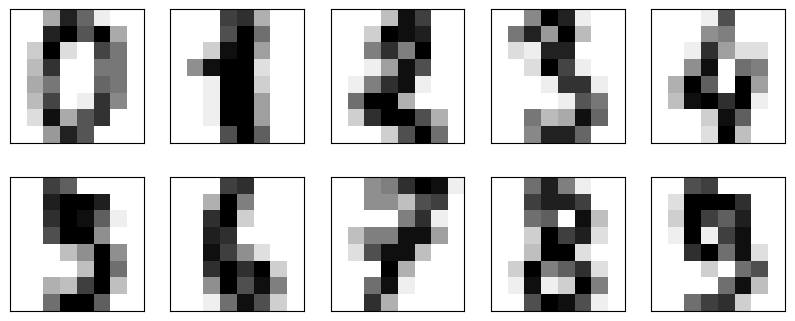

データの現状: (1797, 64)
正解ラベルの現状: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

digits_data = datasets.load_digits()

n_img = 10
plt.figure(figsize=(10, 4))
for i in range(n_img):
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(digits_data.images[i], cmap=plt.cm.gray_r)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

print("データの現状:", digits_data.data.shape)
print("正解ラベルの現状:", digits_data.target[:n_img])

In [ ]:
import torch
from sklearn.model_selection import train_test_split

digit_images = digits_data.images.reshape(-1, 64)
labels = digits_data.target
x_train, x_test, t_train, t_test = train_test_split(digit_images, labels)

x_train = torch.tensor(x_train, dtype=torch.float32)
t_train = torch.tensor(t_train, dtype=torch.int64)
x_test = torch.tensor(x_test, dtype=torch.float32)
t_test = torch.tensor(t_test, dtype=torch.int64)

In [ ]:
from torch import nn

net = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)
print(net)

Sequential(
  (0): Linear(in_features=64, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=10, bias=True)
)


# 学習

モデルを訓練します。
今回は、損失関数に交差エントロピー誤差を、最適化アルゴリズムにSGD（確率的勾配降下法）を設定します。
純伝播は訓練データ、テストデータ両者で行い誤差を計算します。
逆伝播を行うのは、訓練データのみです。

In [ ]:
from torch import optim

# 交差エントロピー誤差関数
loss_fnc = nn.CrossEntropyLoss()

# SGD
optimizer = optim.SGD(net.parameters(), lr=0.01) # 学習率は0.01

# 損失のログ
record_loss_train = []
record_loss_test = []

# 1000エポック学習
for i in range(1000):

  # 勾配を0に
  optimizer.zero_grad()

  # 純伝播
  y_train = net(x_train)
  y_test = net(x_test)

  # 誤差の計算
  loss_train = loss_fnc(y_train, t_train)
  loss_test = loss_fnc(y_test, t_test)
  record_loss_train.append(loss_train.item())
  record_loss_test.append(loss_test.item())

  # 逆伝播
  loss_train.backward()

  # パラメータの更新
  optimizer.step()

  if i%100 == 0:
    print("Epoch:", i, "Loss_Train", loss_train.item(), "Loss_Test:", loss_test.item())

Epoch: 0 Loss_Train 2.5538504123687744 Loss_Test: 2.599799633026123
Epoch: 100 Loss_Train 0.8249393105506897 Loss_Test: 0.8966474533081055
Epoch: 200 Loss_Train 0.3941132426261902 Loss_Test: 0.45767831802368164
Epoch: 300 Loss_Train 0.25777098536491394 Loss_Test: 0.31696203351020813
Epoch: 400 Loss_Train 0.19327399134635925 Loss_Test: 0.2505086064338684
Epoch: 500 Loss_Train 0.15457463264465332 Loss_Test: 0.21164605021476746
Epoch: 600 Loss_Train 0.1289665699005127 Loss_Test: 0.18602342903614044
Epoch: 700 Loss_Train 0.1107143759727478 Loss_Test: 0.1682373732328415
Epoch: 800 Loss_Train 0.09686256945133209 Loss_Test: 0.1553185135126114
Epoch: 900 Loss_Train 0.0858745202422142 Loss_Test: 0.14551521837711334


# 誤差の推移

訓練データ、テストデータで誤差の推移をグラフ表示します。

<function matplotlib.pyplot.show(close=None, block=None)>

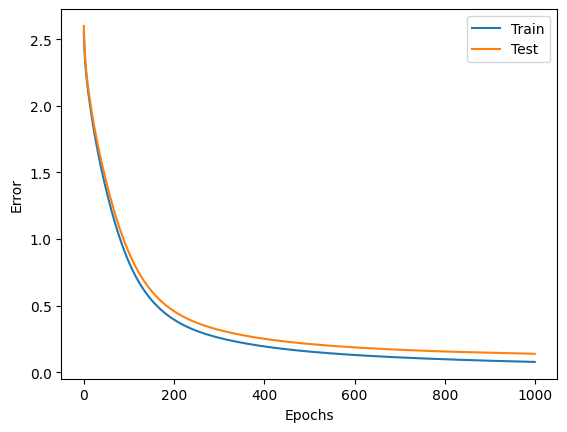

In [ ]:
plt.plot(range(len(record_loss_train)), record_loss_train, label="Train")
plt.plot(range(len(record_loss_test)), record_loss_test, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show

In [ ]:
y_test = net(x_test)
count = (y_test.argmax(1) == t_test).sum().item()
print("正解率:", str(count/len(y_test)*100) + "%")

正解率: 95.11111111111111%


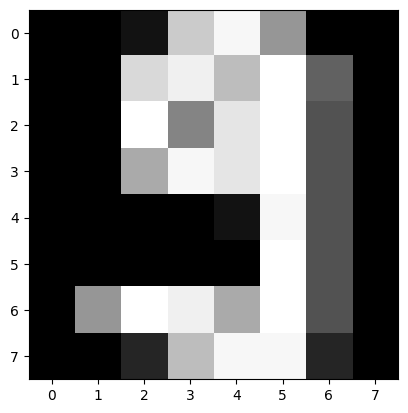

正解: 9 予測結果: 9


In [ ]:
img_id = 128
x_pred = digit_images[img_id]
image = x_pred.reshape(8, 8)
plt.imshow(image, cmap="Greys_r")
plt.show()

x_pred = torch.tensor(x_pred, dtype=torch.float32)
y_pred = net(x_pred)
print("正解:", labels[img_id], "予測結果:", y_pred.argmax().item())